**IsBit Research and Testing Notebook**

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from sklearn.manifold import TSNE

C:\Users\moell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


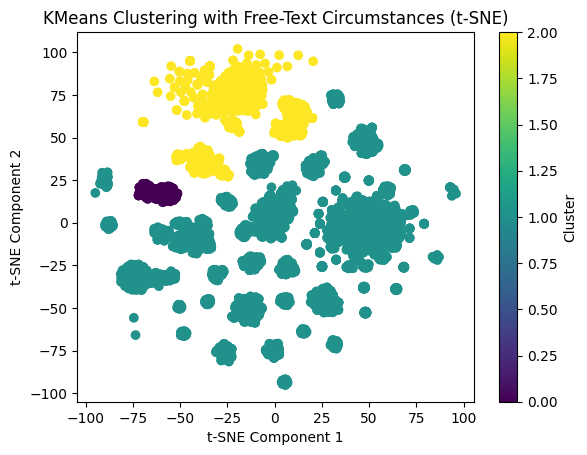

In [14]:
# Step 1: Load the data from the CSV file
df = pd.read_csv('data/QAQC/swe_qaqc_train.csv')

# Step 2: Preprocess the free-text column ('text') using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df['text'])

# Step 3: Preprocess the structured data (One-Hot Encode 'verbose label', 'coarse label', and 'fine label')
df_encoded = pd.get_dummies(df, columns=['verbose label', 'coarse label', 'fine label'], drop_first=True)

# Step 4: Select the features for clustering (excluding 'text' since it's handled by TF-IDF)
features = df_encoded.drop(['text'], axis=1)

# Step 5: Normalize the structured data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Combine the structured and text data (TF-IDF vectors)
combined_features = hstack([scaled_features, tfidf_matrix]).toarray()

# Step 7: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_features)

# Step 8: Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Step 9: Use t-SNE for visualization of clusters
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(combined_features)

# Plot the clusters in a 2D space
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('KMeans Clustering with Free-Text Circumstances (t-SNE)')
plt.colorbar(label='Cluster')
plt.show()